# Neural Networks

## References

* https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib import colors
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
pylab.rcParams['figure.figsize'] = (10, 8)
pylab.rcParams['contour.negative_linestyle'] = 'solid'

In [3]:
def plot_decision_countour_probs(X, y, clf):
    nx = ny = 200
    x_min, y_min = np.round(np.min(X, axis=0)) - 1
    x_max, y_max = np.round(np.max(X, axis=0)) + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    D=np.c_[xx.ravel(), yy.ravel()]
    p=clf.predict_proba(D)[:, 1]
    print(np.max(p))
    print(np.min(p))
    p=p.reshape(xx.shape)
    plt.pcolormesh(xx, yy, p, cmap='RdBu',
                       norm=colors.Normalize(0, 1))

    for i in range(len(X)):
        if y[i] == 1:
            plt.plot(X[i][0], X[i][1], 'o', color='blue', markersize=10)
        else:
            plt.plot(X[i][0], X[i][1], 's', color='red', markersize=10)

    plt.contour(xx, yy, p, [0.5], linewidths=2., colors='k')
    #plt.contour(xx, yy, p, [1], linewidths=2., colors='b')
    #plt.contour(xx, yy, p, [0], linewidths=2., colors='r')

# Linear Boundary

In [4]:
X = np.array([[0.5, 2], [1, 1], [1, 3], [3, 1], [3, 3], [3.5, 2]])
y = np.array([1, 1., 1., -1., -1., -1.])

In [5]:
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='tanh', alpha=1, solver='lbfgs')
clf.fit(X, y)

MLPClassifier(activation='tanh', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [6]:
clf.score(X, y)

1.0

In [7]:
clf.predict_proba(X)

array([[0.11707374, 0.88292626],
       [0.19454881, 0.80545119],
       [0.19478111, 0.80521889],
       [0.80514329, 0.19485671],
       [0.80537592, 0.19462408],
       [0.88292965, 0.11707035]])

0.9612273333309396
0.03871378493737015


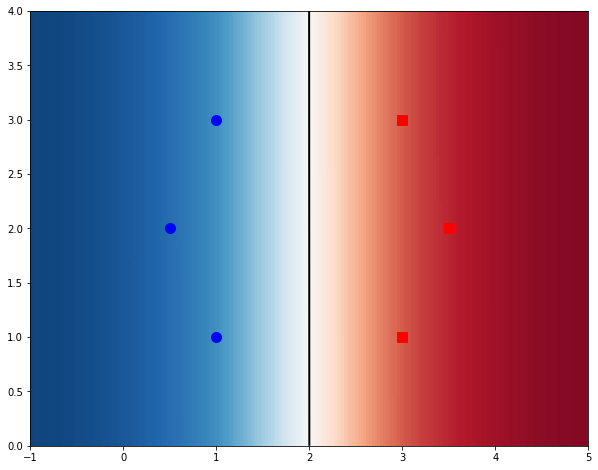

In [8]:
plot_decision_countour_probs(X, y, clf)

# XOR

In [9]:
X = np.array([[1, 1], [1, 3], [3, 1], [3, 3]])
y = np.array([1., -1., -1., 1.])

In [10]:
clf = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', alpha=0.1, solver='lbfgs')
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [11]:
clf.score(X, y)

1.0

In [12]:
clf.predict_proba(X)

array([[0.12343965, 0.87656035],
       [0.83512677, 0.16487323],
       [0.94599876, 0.05400124],
       [0.08188809, 0.91811191]])

0.9337220771380607
0.0003650621247002683


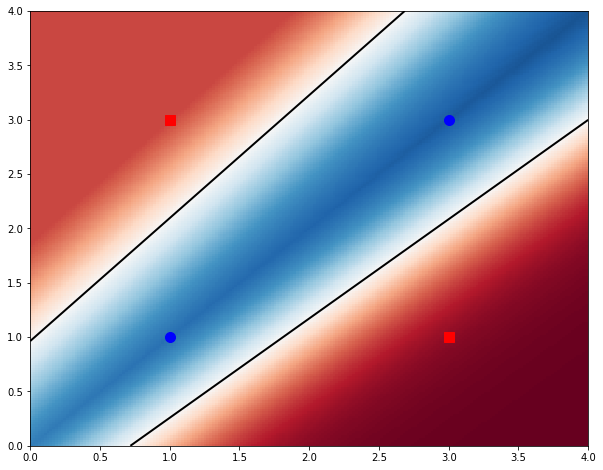

In [13]:
plot_decision_countour_probs(X, y, clf)

# Circle

In [14]:
from sklearn.datasets import make_circles

In [15]:
X, y = make_circles(noise=0.2, factor=0.5, random_state=42)

In [16]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [17]:
clf = MLPClassifier(hidden_layer_sizes=(4,), activation='tanh', alpha=0.01, solver='lbfgs')
clf.fit(X, y)

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [18]:
clf.score(X, y)

0.9

0.9999997471755329
2.5958548747717955e-09


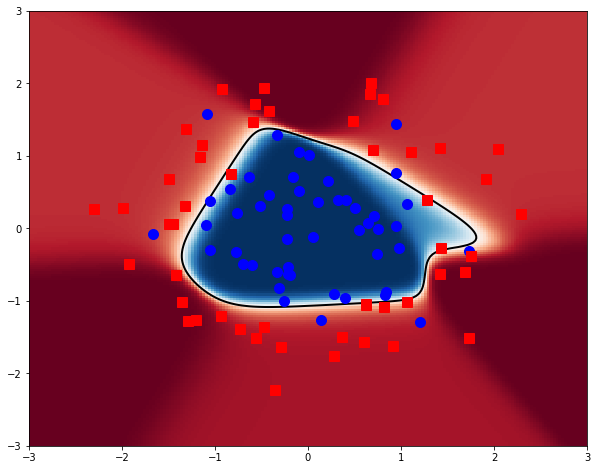

In [19]:
plot_decision_countour_probs(X, y, clf)

# MNIST Data

In [20]:
from sklearn.datasets import fetch_openml

In [31]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [32]:
X.shape

(70000, 784)

In [33]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [34]:
binary = False
if binary:
    subclasses = ['3', '8']

    chosen_bool = np.full((X.shape[0], ), False)

    for sc in subclasses:
        chosen_bool = np.logical_or(chosen_bool, y==sc)

    X = X[chosen_bool]
    y = y[chosen_bool]

    y[y=='3'] = 0
    y[y=='8'] = 1
    y = np.asarray(y, dtype=int)

In [35]:
X.shape

(70000, 784)

In [36]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [37]:
rs = np.random.RandomState(42)
shuffle = rs.permutation(X.shape[0])
X = X[shuffle]
y = y[shuffle]

In [38]:
ts = 60000
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = ts, test_size=X.shape[0]-ts)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
lr = LogisticRegression(solver='sag', multi_class='auto', penalty='l2', C=1)

In [41]:
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

c:\users\mbilg\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9315
0.9181


In [42]:
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

Iteration 1, loss = 0.29817143
Iteration 2, loss = 0.23277601
Iteration 3, loss = 0.21156405
Iteration 4, loss = 0.21661755
Iteration 5, loss = 0.16569458
Iteration 6, loss = 0.14913800
Iteration 7, loss = 0.13136560
Iteration 8, loss = 0.11616412
Iteration 9, loss = 0.14258548
Iteration 10, loss = 0.10434479
Iteration 11, loss = 0.14802529
Iteration 12, loss = 0.15348873
Iteration 13, loss = 0.17584244
Iteration 14, loss = 0.14225165
Iteration 15, loss = 0.12848255
Iteration 16, loss = 0.15793428
Iteration 17, loss = 0.20735838
Iteration 18, loss = 0.19300389
Iteration 19, loss = 0.20928842
Iteration 20, loss = 0.19833170


c:\users\mbilg\appdata\local\programs\python\python35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9794
0.9529
